IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df1 = pd.read_csv("Mumbai House Prices.csv")
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [5]:
df1.shape

(76038, 9)

In [6]:
df1.groupby('type')['type'].agg('count')

type
Apartment            74854
Independent House       73
Penthouse                3
Studio Apartment       882
Villa                  226
Name: type, dtype: int64

In [7]:
df2 = df1.drop(['locality','status','age'], axis='columns')
df2.head()

,bhk,type,area,price,price_unit,region
0,3,Apartment,685,2.50,Cr,Andheri West
1,2,Apartment,640,52.51,L,Naigaon East
2,2,Apartment,610,1.73,Cr,Borivali West
3,2,Apartment,876,59.98,L,Panvel
4,2,Apartment,659,94.11,L,Mira Road East


In [8]:
df2.isnull().sum()

bhk           0
type          0
area          0
price         0
price_unit    0
region        0
dtype: int64

In [9]:
df2 = df2.dropna()
df2.isnull().sum()

bhk           0
type          0
area          0
price         0
price_unit    0
region        0
dtype: int64

In [10]:
df2['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7])

In [11]:
df2[df2.price>10]

,bhk,type,area,price,price_unit,region
1,2,Apartment,640,52.51,L,Naigaon East
3,2,Apartment,876,59.98,L,Panvel
4,2,Apartment,659,94.11,L,Mira Road East
8,1,Apartment,396,29.84,L,Badlapur East
10,1,Studio Apartment,502,16.56,L,Badlapur West
...,...,...,...,...,...,...
75993,1,Apartment,450,74.00,L,Thane West
76028,2,Apartment,639,87.47,L,Thane West
76029,2,Apartment,550,75.26,L,Thane West
76034,5,Apartment,3049,12.00,Cr,Juhu


In [12]:
df2.area.unique()

array([ 685,  640,  610, ..., 1974, 1634, 3049])

In [13]:
for index, row in df2.iterrows():
    if row['price_unit'] == 'Cr':
        df2.at[index, 'price'] = row['price'] * 100

In [14]:
df2.head()

,bhk,type,area,price,price_unit,region
0,3,Apartment,685,250.00,Cr,Andheri West
1,2,Apartment,640,52.51,L,Naigaon East
2,2,Apartment,610,173.00,Cr,Borivali West
3,2,Apartment,876,59.98,L,Panvel
4,2,Apartment,659,94.11,L,Mira Road East


In [15]:
df3 = df2.drop(['price_unit'], axis='columns')
df3.head()

,bhk,type,area,price,region
0,3,Apartment,685,250.00,Andheri West
1,2,Apartment,640,52.51,Naigaon East
2,2,Apartment,610,173.00,Borivali West
3,2,Apartment,876,59.98,Panvel
4,2,Apartment,659,94.11,Mira Road East


In [16]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['area']
df4.head()

,bhk,type,area,price,region,price_per_sqft
0,3,Apartment,685,250.00,Andheri West,36496.350365
1,2,Apartment,640,52.51,Naigaon East,8204.687500
2,2,Apartment,610,173.00,Borivali West,28360.655738
3,2,Apartment,876,59.98,Panvel,6847.031963
4,2,Apartment,659,94.11,Mira Road East,14280.728376


In [17]:
len(df4.region.unique())

228

In [18]:
df4.region = df4.region.apply(lambda x: x.strip())
region_stats = df4.groupby('region')['region'].agg('count').sort_values(ascending=False)
region_stats

region
Thane West             14868
Mira Road East          9902
Dombivali               3041
Kandivali East          2568
Kharghar                2362
                       ...  
Rambaug                    1
Police Colony              1
Pestom Sagar Colony        1
Pen                        1
vile parle west            1
Name: region, Length: 228, dtype: int64

In [19]:
len(region_stats[region_stats<=10])

114

In [20]:
region_stats_less_than_10 = region_stats[region_stats<=10]
region_stats_less_than_10

region
Sector 20 Kamothe      10
Kanjurmarg East        10
Vasind                 10
Koproli                10
Maneklal Estate         9
                       ..
Rambaug                 1
Police Colony           1
Pestom Sagar Colony     1
Pen                     1
vile parle west         1
Name: region, Length: 114, dtype: int64

In [21]:
len(df4.region.unique())

228

In [22]:
df4.region = df4.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)
len(df4.region.unique())

115

In [23]:
df4[df4.area/df4.bhk<300].head()

,bhk,type,area,price,region,price_per_sqft
0,3,Apartment,685,250.0,Andheri West,36496.350365
7,3,Apartment,778,289.0,Santacruz East,37146.529563
12,3,Apartment,753,177.0,Chembur,23505.976096
18,2,Apartment,555,142.0,Thane West,25585.585586
20,2,Apartment,582,149.0,Vikhroli,25601.374570


In [24]:
df4.shape

(76038, 6)

In [25]:
df5 = df4[~(df4.area/df4.bhk<300)]
df5.shape

(71567, 6)

In [26]:
df5.price_per_sqft.describe()

count     71567.000000
mean      14946.070563
std        9379.789589
min         646.766169
25%        8455.882353
50%       12727.272727
75%       19165.727170
max      182307.692308
Name: price_per_sqft, dtype: float64

In [27]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('region'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(53873, 6)

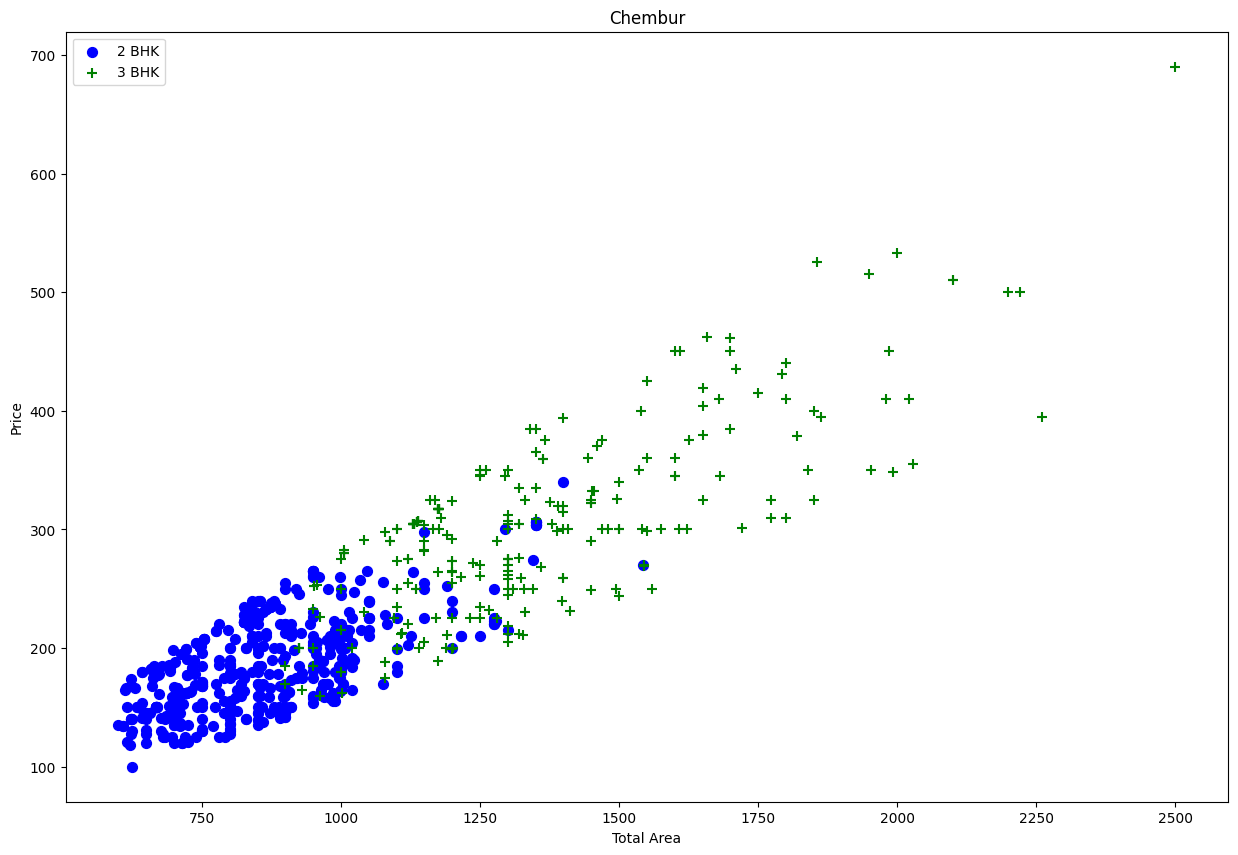

In [28]:
def plot_scatter_chart(df, region):
  bhk2 = df[(df.region == region) & (df.bhk == 2)]
  bhk3 = df[(df.region == region) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.area,bhk3.price, marker='+', color='green',label='3 BHK', s=50)
  plt.xlabel("Total Area")
  plt.ylabel("Price")
  plt.title(region)
  plt.legend()

plot_scatter_chart(df6, "Chembur")

In [29]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for region, region_df in df.groupby('region'):
    bhk_stats = {}
    for bhk, bhk_df in region_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean' : np.mean(bhk_df.price_per_sqft),
          'sd' : np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }
    for bhk, bhk_df in region_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(36801, 6)

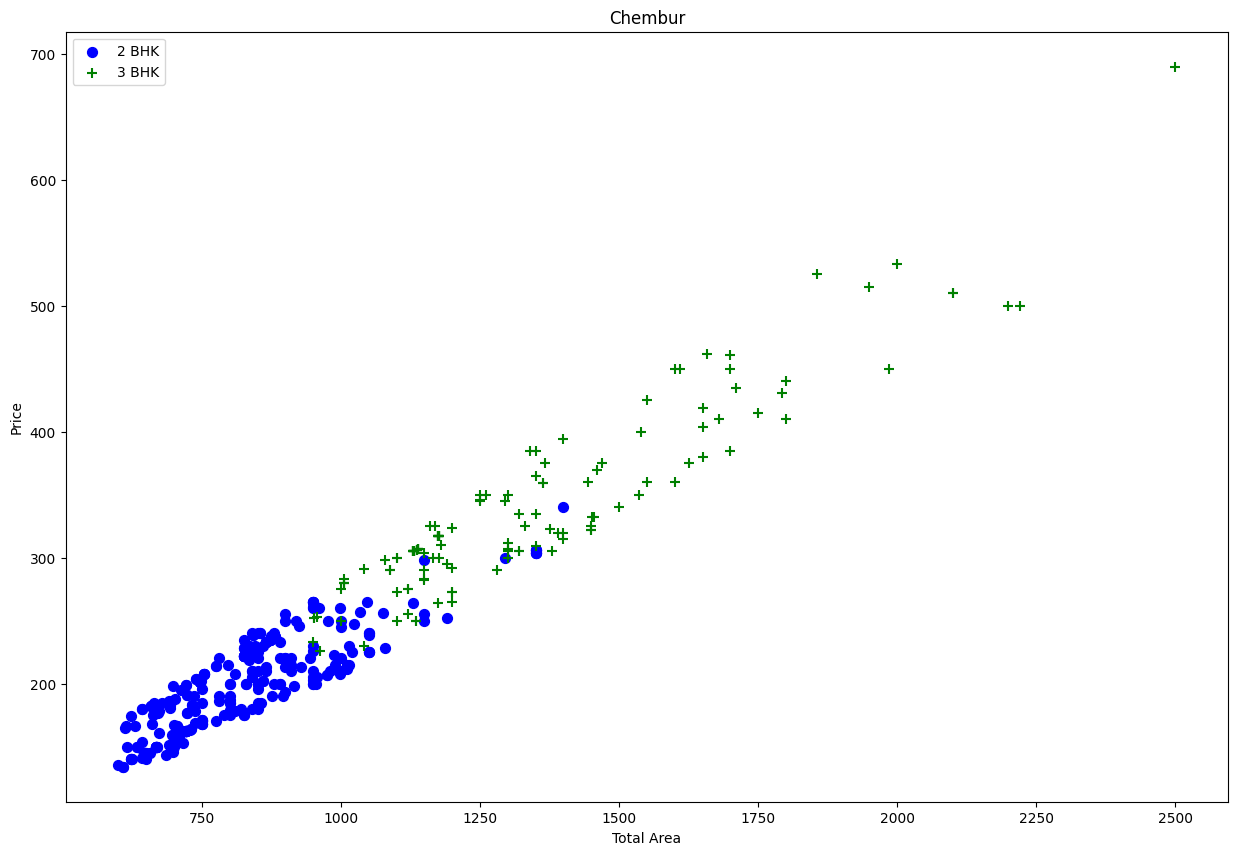

In [30]:
plot_scatter_chart(df7, "Chembur")

Text(0, 0.5, 'Count')

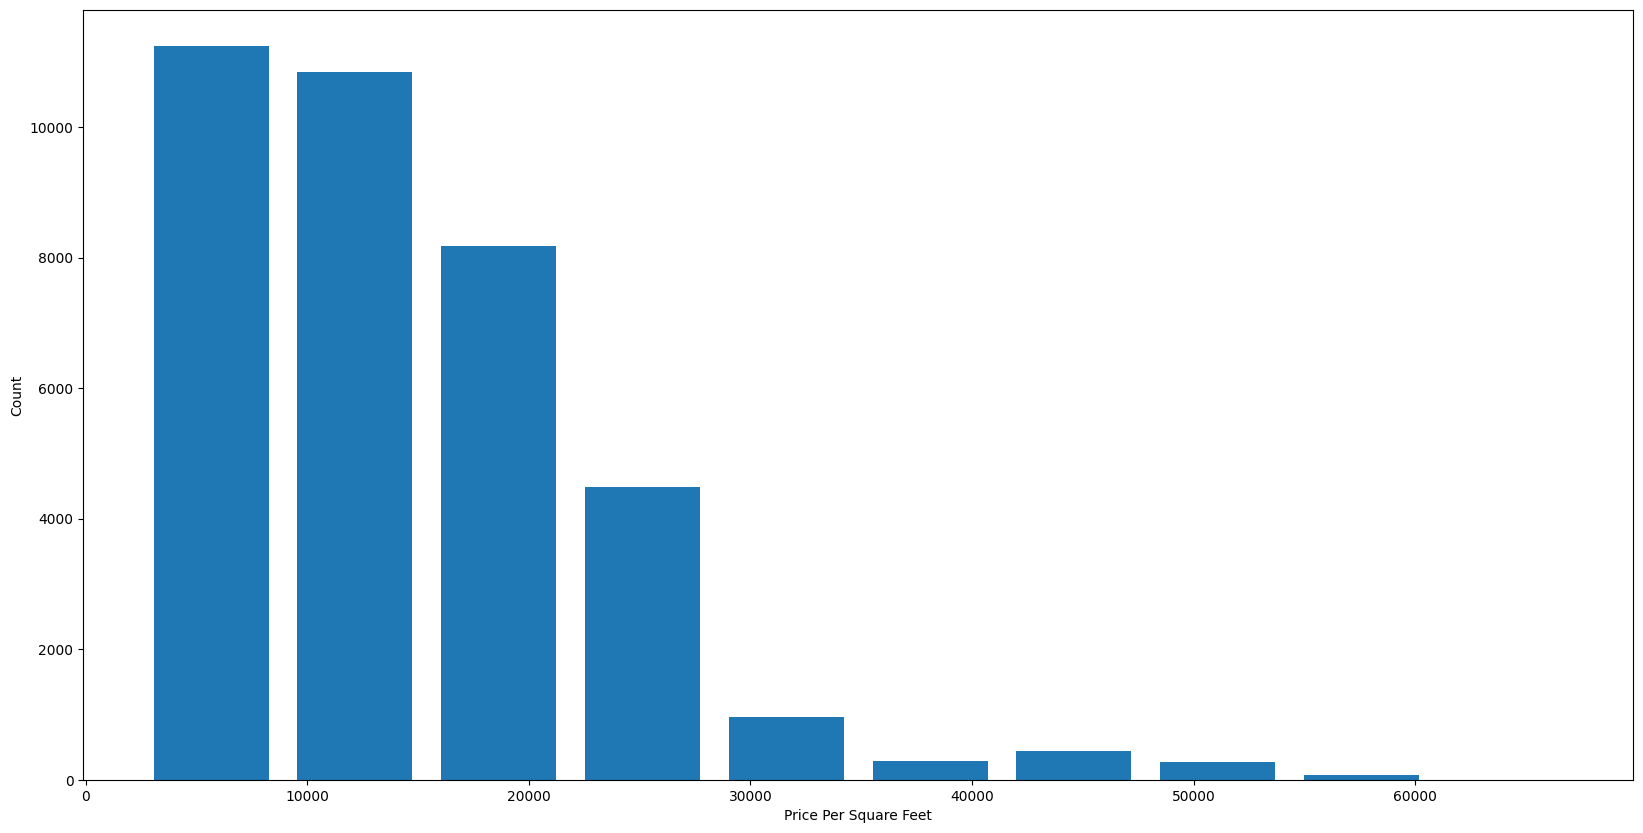

In [31]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [32]:
df8 = df7.drop(['price_per_sqft'],axis='columns')
df8.head()

,bhk,type,area,price,region
0,2,Apartment,650,262.0,Agripada
1,1,Apartment,803,225.0,Agripada
2,1,Apartment,684,170.0,Agripada
3,1,Apartment,545,160.0,Agripada
10,4,Apartment,3454,1250.0,Agripada


In [33]:
dummies = pd.get_dummies(df8.region)
dummies.head()

,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,Badlapur West,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')], axis='columns')
df9.head()

,bhk,type,area,price,region,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,262.0,Agripada,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,225.0,Agripada,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,170.0,Agripada,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,160.0,Agripada,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,1250.0,Agripada,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df10 = df9.drop('region',axis='columns')
df10.head()

,bhk,type,area,price,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,262.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,225.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,170.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,160.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,1250.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
x = df10.drop(['price','type'],axis='columns')
x.head(2)

,bhk,area,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,803,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
y = df10.price
y.head(2)

0    262.0
1    225.0
Name: price, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [39]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8916997860484497

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87902574, 0.87855999, 0.88291345, 0.88372214, 0.86489675])

In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def find_best_model_using_gridsearchcv(x,y):
  algos = {
      'linear_regression' : {
          'model' : make_pipeline(StandardScaler(), LinearRegression()),
          'params' : {
              'standardscaler__with_mean' : [True, False],
              'standardscaler__with_std' : [True, False] 
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1, 2],
              'selection' : ['random', 'cyclic']
          }
      },
      'decision_tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['friedman_mse'],
              'splitter' : ['best', 'random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False, error_score='raise')
    gs.fit(x,y)
    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })

  return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.877824,"{'standardscaler__with_mean': True, 'standards..."
1,lasso,0.719340,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.952286,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [41]:
from sklearn.tree import DecisionTreeRegressor
lr_clf2 = DecisionTreeRegressor()
lr_clf2.fit(x_train,y_train)
lr_clf2.score(x_test,y_test)

0.9529077947237274

In [43]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 220.2/239.5 MB 519.9 kB/s eta 0:00:38

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reshape data for CNN (adding an extra dimension)
x_cnn = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], 1)

# Split data
x_train_cnn, x_test_cnn, y_train, y_test = train_test_split(x_cnn, y, test_size=0.2, random_state=10)

# Define CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)),
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(x_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(x_test_cnn, y_test))

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test_cnn, y_test)
print(f"Mean Absolute Error on Test Set: {test_mae}")


ModuleNotFoundError: No module named 'tensorflow'

In [95]:
# def predict_price(region,area,bhk):
#   loc_index = np.where(x.columns==region)[0][0]

#   X = np.zeros(len(x.columns))

#   X[0] = area
#   X[1] = bhk
#   if loc_index >= 0:
#     X[loc_index] = 1

#   return lr_clf.predict([X])[0]

In [109]:
def predict_price(region, area, bhk):
    # Start with an array of zeros with the length equal to the number of features in x_train
    X = np.zeros(len(x_train.columns))

    # Find the index of the region in the feature set
    loc_index = np.where(x_train.columns == region)[0][0]

    # Set the area and bhk values (assuming area and bhk are the first two features)
    X[0] = bhk
    X[1] = area

    # Set the correct region feature to 1
    if loc_index >= 0:
        X[loc_index] = 1

    # Predict using the trained Linear Regression model
    return lr_clf2.predict([X])[0]


In [112]:
predict_price(region='Naigaon East',area=800,bhk=3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


62.0

In [113]:
import pickle
with open('Mumbai_House_Prices_Model.pickle','wb') as f:
  pickle.dump(lr_clf2,f)

In [114]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))